# CircNNM

Circulant matrix nuclear norm minimization (CircNNM) for traffic time series imputation.

In [1]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def prox(z, w, lmbda):
    T = z.shape[0]
    temp = np.fft.fft(z - w / lmbda)
    temp1 = np.abs(temp) - T / lmbda
    temp1[temp1 <= 0] = 0
    return np.fft.ifft(temp / np.abs(temp) * temp1).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (eta * y_train + lmbda * z[pos_train]) / (eta + lmbda)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def CircNNM(y_true, y, lmbda, maxiter = 50):
    eta = 100 * lmbda
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    del y_true, y
    show_iter = 100
    for it in range(maxiter):
        x = prox(z, w, lmbda)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

Univariate time series imputation on the Portland traffic speed time series.

Portland traffic speed time series imputation on the partially observed data with the 95% missing rate.

Missing rate = 0.95
100
0.02470892615617949
1.8142529435408241



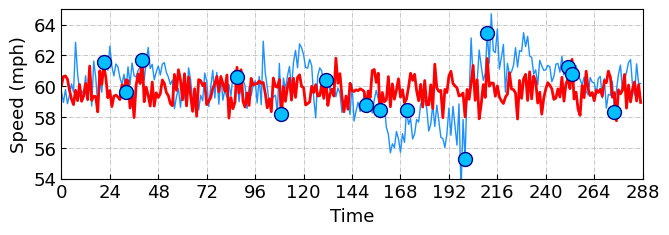

In [2]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 5e-3 * T
maxiter = 100
x = CircNNM(dense_vec, sparse_vec, lmbda, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(x[: 96 * d], 'red', linewidth = 2)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('circnnm_speeds_{}.pdf'.format(round(missing_rate * 100)), bbox_inches = 'tight')
plt.show()

Portland traffic volume time series imputation on the partially observed data with the 95% missing rate.

Missing rate = 0.95
100
0.3631229869211138
34.429904800158944



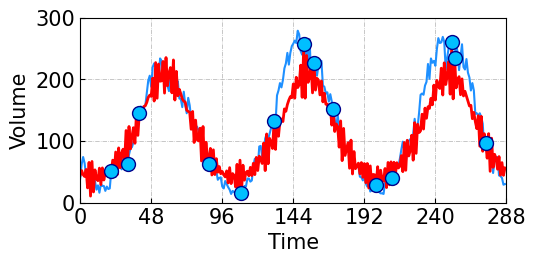

In [3]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/volume.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 5e-4 * T
maxiter = 100
x = CircNNM(dense_vec, sparse_vec, lmbda, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize = (5.5, 2.4))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1.5)
plt.plot(x[: 96 * d], 'red', linewidth = 2)
pos = np.where(sparse_vec != 0)
plt.plot(pos[0], sparse_vec[pos], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.xticks(np.arange(0, 96 * d + 1, 48))
plt.xlim([0, 96 * d])
plt.yticks(np.arange(0, 301, 100))
plt.ylim([0, 300])
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('circnnm_volumes_95.pdf', bbox_inches = 'tight')
plt.show()

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>